<a href="https://colab.research.google.com/github/Diyaa-lacoul/Ai-Coursework/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



# Loading dataset

In [3]:
# Loading dataset
df = pd.read_csv('/content/Dengue Data.csv')

# Exploring data and visualization

In [4]:
# Exploring data and visualization
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Checking for null values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         731 non-null    object 
 1   Date.1       731 non-null    object 
 2   Time         731 non-null    int64  
 3   Case         731 non-null    int64  
 4   Rainfall     731 non-null    float64
 5   Temperature  731 non-null    float64
 6   Humidity     731 non-null    float64
 7   Wind         731 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.8+ KB
None

Summary Statistics:
             Time         Case    Rainfall  Temperature    Humidity  \
count  731.000000   731.000000  731.000000   731.000000  731.000000   
mean   366.000000   274.835841    5.081669    26.940575   73.672367   
std    211.165812   287.512102   12.262097     4.232607   15.068418   
min      1.000000     0.000000    0.000000    15.100000   27.000000   
25%    183.500000 

#Visualize the distribution of cases graph

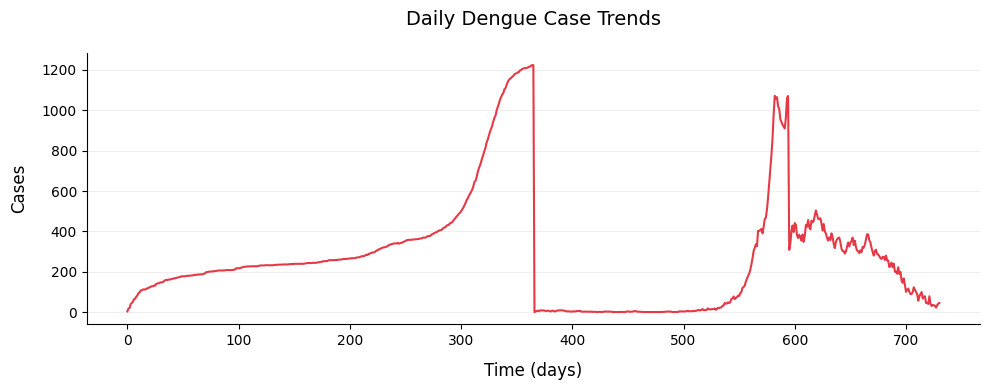

In [12]:
#Visualize the distribution of cases graph
plt.figure(figsize=(10, 4), facecolor='white')  # Clean white background
plt.plot(df['Case'], color='#E63946', linewidth=1.5)  # Modern red color
plt.title('Daily Dengue Case Trends', pad=20, fontsize=14)  # Better spacing
plt.xlabel('Time (days)', fontsize=12, labelpad=10)
plt.ylabel('Cases', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.2)  # Only horizontal gridlines
plt.gca().spines[['top','right']].set_visible(False)  # Remove chart borders
plt.tight_layout()
plt.show()

In [14]:
# Create a binary target variable (1 for outbreak days, 0 for non-outbreak)
# We'll define an outbreak day as when cases are above the 75th percentile
outbreak_threshold = df['Case'].quantile(0.75)
df['Outbreak'] = (df['Case'] > outbreak_threshold).astype(int)


# Visualizing the relationship between features and outbreaks

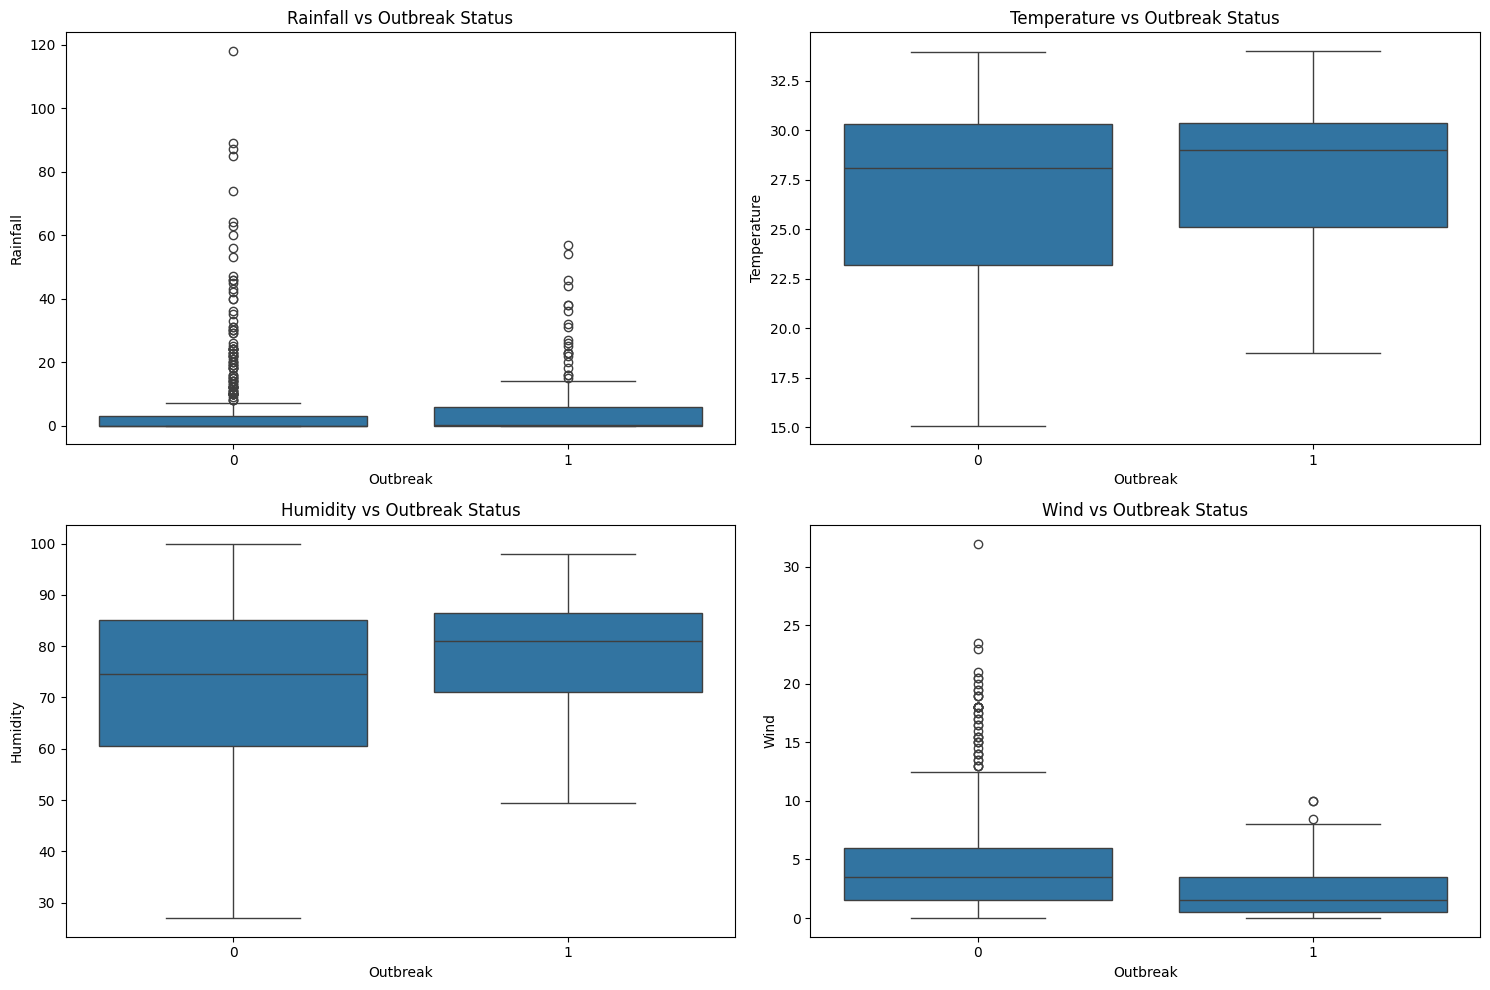

In [15]:
# Visualizing the relationship between features and outbreaks
plt.figure(figsize=(15, 10))
features = ['Rainfall', 'Temperature', 'Humidity', 'Wind']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outbreak', y=feature, data=df)
    plt.title(f'{feature} vs Outbreak Status')
plt.tight_layout()
plt.show()

Correlation matrix

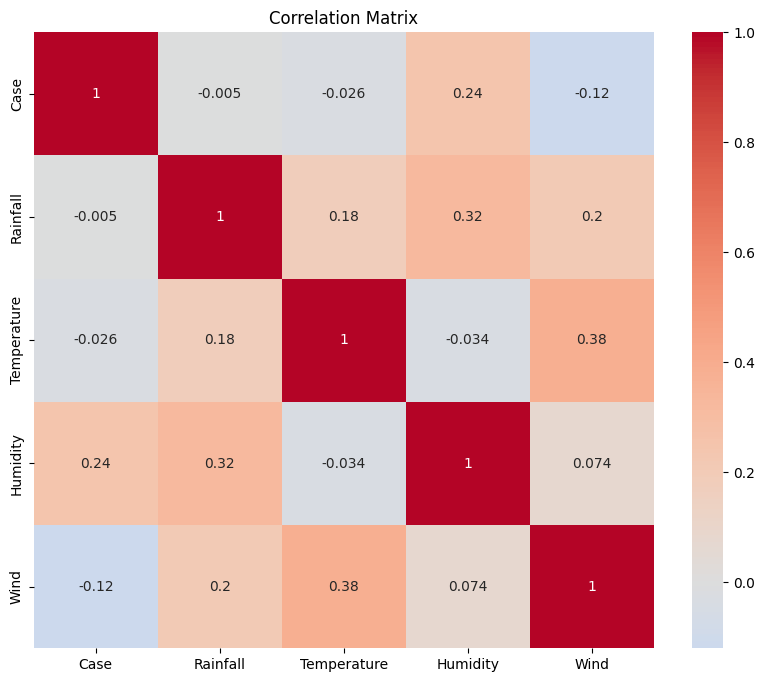

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['Case', 'Rainfall', 'Temperature', 'Humidity', 'Wind']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


Preparing data for modeling

In [17]:
# Preparing data for modeling
X = df[['Rainfall', 'Temperature', 'Humidity', 'Wind']]
y = df['Outbreak']


Spliting the data into training and testing sets

In [18]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 Feature standardization

In [21]:
# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the Logistic Regression model


In [22]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)